In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from ObjectDetectionElsys.config import Config
from ObjectDetectionElsys.kmeans import distance, find_anchor_boxes, get_average_IoU, get_kmeans_values_from_annotations, format_anchors

In [2]:
cfg_path = r".\cfg\mobilenetyolov2.cfg"
config = Config(cfg_path)

grid_width = config.get('grid_width')
grid_height = config.get('grid_height')

annotations_path = r".\annotations"

In [3]:
kmeans_values = get_kmeans_values_from_annotations(annotations_path, grid_width, grid_height)

Found 5011 annotation files


In [4]:
start = time.time()
centers, clusters = find_anchor_boxes(kmeans_values, 5)
end = time.time()
print(f'Ran KMeans for 5 clusters in {(end - start):.2f}s')

start = time.time()
average_IoU = get_average_IoU(kmeans_values, centers)
end = time.time()
print(f'Calculated average IoU in {(end - start):.2f}s')

print(f'Average IoU: {average_IoU}')
print(format_anchors(centers))

Ran KMeans for 5 clusters in 13.45s
Calculated average IoU in 0.52s
Average IoU: 0.691346300703301
[1.29, 2.14, 2.77, 4.77, 4.39, 9.02, 7.75, 5.29, 10.16, 10.48]


For 1 clusters: Average IoU: 0.40704424692329755, ran KMeans in: 0.51s
For 2 clusters: Average IoU: 0.5674078742077427, ran KMeans in: 3.79s
For 3 clusters: Average IoU: 0.6363616385661186, ran KMeans in: 5.51s
For 4 clusters: Average IoU: 0.6661508980416211, ran KMeans in: 26.63s
For 5 clusters: Average IoU: 0.6917087489011795, ran KMeans in: 17.79s
For 6 clusters: Average IoU: 0.7083872016134917, ran KMeans in: 40.62s
For 7 clusters: Average IoU: 0.7280686835807437, ran KMeans in: 57.22s
For 8 clusters: Average IoU: 0.7405129909331917, ran KMeans in: 45.60s
For 9 clusters: Average IoU: 0.7538083574506018, ran KMeans in: 62.52s
For 10 clusters: Average IoU: 0.7610385497121374, ran KMeans in: 61.48s
For 11 clusters: Average IoU: 0.7691313205625482, ran KMeans in: 57.83s
For 12 clusters: Average IoU: 0.7771098458019787, ran KMeans in: 68.26s
For 13 clusters: Average IoU: 0.7834773911048138, ran KMeans in: 84.20s
For 14 clusters: Average IoU: 0.7917171160928774, ran KMeans in: 96.49s
For

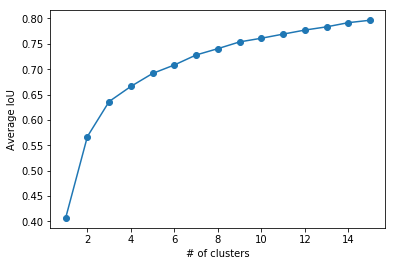

In [5]:
ks = []
anchors = []
IoUs = []
for k in range(1, 16):   
    start = time.time()
    
    ks.append(k)
    
    centers, clusters = find_anchor_boxes(kmeans_values, k)
    anchors.append(centers)
    average_IoU = get_average_IoU(kmeans_values, centers)
    IoUs.append(average_IoU)
    
    end = time.time()
    print(f'For {k} clusters: Average IoU: {average_IoU}, ran KMeans in: {(end - start):.2f}s')
    
plt.plot(ks, IoUs, marker='o')
plt.xlabel('# of clusters')
plt.ylabel('Average IoU')
plt.show()

In [6]:
for i in range(len(anchors)):
    print(ks[i])
    print(format_anchors(anchors[i]))
    print()

1
[4.36, 5.66]

2
[1.97, 3.35, 7.47, 8.65]

3
[1.53, 2.6, 4.04, 6.49, 9.45, 9.54]

4
[1.31, 2.45, 3.74, 4.57, 4.51, 8.77, 10.08, 9.53]

5
[1.3, 2.12, 2.71, 4.77, 4.39, 9.0, 7.61, 5.21, 10.15, 10.45]

6
[1.25, 2.08, 2.15, 5.38, 4.43, 3.78, 4.59, 9.0, 8.94, 6.12, 10.22, 10.92]

7
[1.21, 1.8, 1.88, 4.15, 3.16, 7.73, 4.83, 4.02, 5.96, 9.8, 9.43, 6.2, 10.88, 11.01]

8
[1.13, 1.79, 1.7, 4.33, 3.08, 7.81, 3.78, 3.02, 5.45, 5.39, 6.09, 10.15, 9.95, 6.45, 11.0, 11.14]

9
[1.13, 1.58, 1.48, 3.5, 2.37, 5.9, 3.61, 9.05, 3.99, 3.08, 5.52, 5.66, 6.76, 10.32, 10.12, 6.32, 11.29, 11.09]

10
[1.02, 1.68, 1.4, 4.3, 2.76, 2.57, 3.07, 9.15, 3.09, 5.28, 5.26, 7.11, 6.46, 3.85, 6.67, 10.72, 10.11, 6.79, 11.31, 11.2]

11
[1.09, 1.48, 1.27, 3.31, 2.11, 5.45, 3.1, 8.67, 3.33, 2.82, 4.63, 5.3, 5.42, 9.36, 7.83, 11.03, 8.52, 4.54, 10.22, 7.43, 11.69, 11.38]

12
[0.97, 1.63, 1.35, 3.93, 2.13, 7.41, 2.51, 2.39, 3.22, 5.03, 3.92, 9.36, 5.29, 3.43, 5.92, 6.74, 6.96, 10.85, 9.75, 4.8, 10.5, 8.08, 11.43, 11.7]

13
[0.